In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=['flength','fwidth','fsize','fcone','fconc1','asym','fm3long','fm3trans','falpha','fdist','class']
df=pd.read_csv("train.csv",names=cols)
df.head()

,flength,fwidth,fsize,fcone,fconc1,asym,fm3long,fm3trans,falpha,fdist,class
0,33.1818,12.4655,2.4955,0.4696,0.2412,-17.0341,-22.0762,-8.1803,41.9290,41.3816,g
1,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680,g
2,29.4741,22.4581,2.6258,0.3077,0.1740,18.1242,22.7035,13.1673,48.0364,214.1260,g
3,36.1741,17.6865,2.9460,0.2865,0.1591,-4.7746,-18.9697,11.3256,0.2540,191.4550,g
4,46.2915,16.0328,2.7756,0.3403,0.1920,49.9706,33.3653,-12.7979,38.7070,75.5234,g


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=['flength','fwidth','fsize','fcone','fconc1','asym','fm3long','fm3trans','falpha','fdist','class']
df=pd.read_csv("train.csv",names=cols)
df.head()

,flength,fwidth,fsize,fcone,fconc1,asym,fm3long,fm3trans,falpha,fdist,class
0,33.1818,12.4655,2.4955,0.4696,0.2412,-17.0341,-22.0762,-8.1803,41.9290,41.3816,g
1,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680,g
2,29.4741,22.4581,2.6258,0.3077,0.1740,18.1242,22.7035,13.1673,48.0364,214.1260,g
3,36.1741,17.6865,2.9460,0.2865,0.1591,-4.7746,-18.9697,11.3256,0.2540,191.4550,g
4,46.2915,16.0328,2.7756,0.3403,0.1920,49.9706,33.3653,-12.7979,38.7070,75.5234,g


In [ ]:
df['class']=(df['class']=='g').astype(int)
df.head()

,flength,fwidth,fsize,fcone,fconc1,asym,fm3long,fm3trans,falpha,fdist,class
0,33.1818,12.4655,2.4955,0.4696,0.2412,-17.0341,-22.0762,-8.1803,41.9290,41.3816,1
1,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680,1
2,29.4741,22.4581,2.6258,0.3077,0.1740,18.1242,22.7035,13.1673,48.0364,214.1260,1
3,36.1741,17.6865,2.9460,0.2865,0.1591,-4.7746,-18.9697,11.3256,0.2540,191.4550,1
4,46.2915,16.0328,2.7756,0.3403,0.1920,49.9706,33.3653,-12.7979,38.7070,75.5234,1


Text(0, 0.5, 'abc')

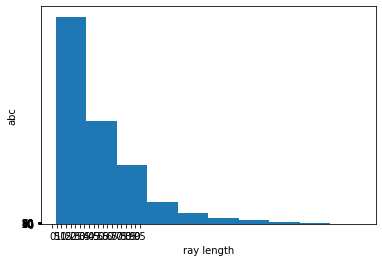

In [ ]:
plt.hist(df.flength)
plt.xticks(range(0,100,5))
plt.yticks(range(0,100,10))
plt.xlabel("ray length")
plt.ylabel("abc")

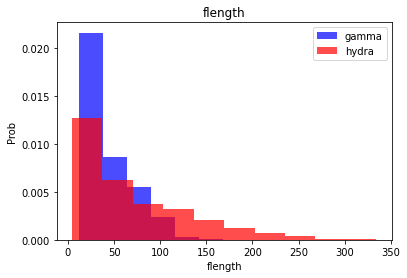

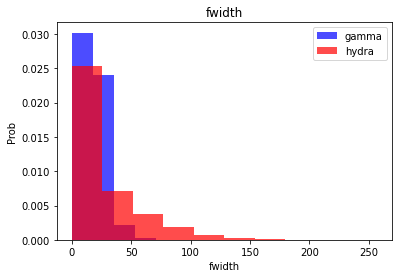

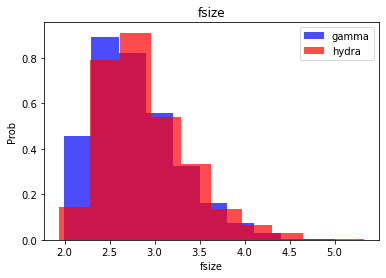

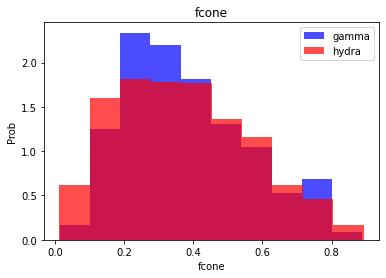

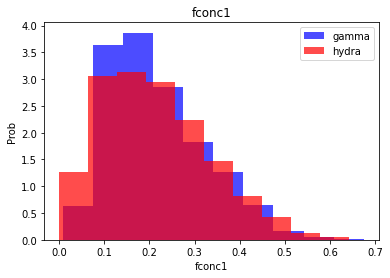

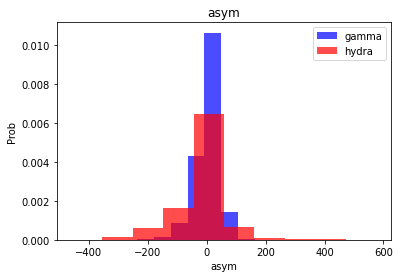

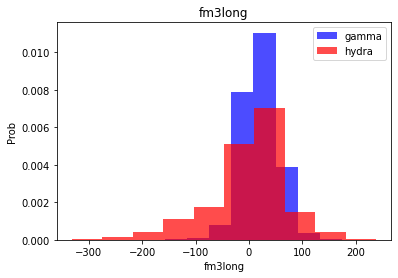

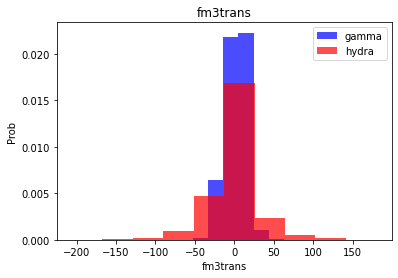

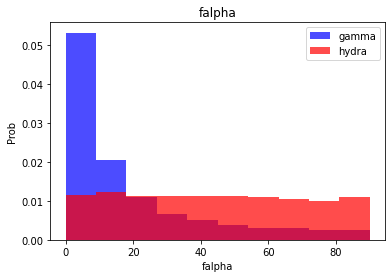

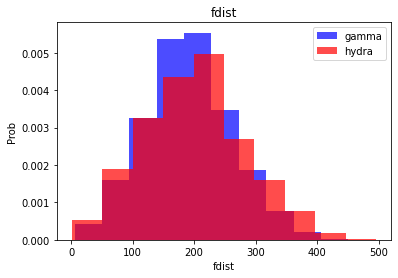

In [ ]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label], color='red',label='hydra',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Prob")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [ ]:
train, valid, test =np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,Oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    scaler=StandardScaler()
    x=scaler.fit_transform(x)#scales the value
    if Oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x, y)
    data=np.hstack((x,np.reshape(y,(-1,1))))
    return data,x,y

In [ ]:
train, x_train, y_train=scale_dataset(train, Oversample=True)
valid, x_valid, y_valid=scale_dataset(valid, Oversample=False)
test, x_test, y_test=scale_dataset(test, Oversample=False)

In [ ]:
len(y_train)

14798

In [ ]:
sum(y_train==1)

7399

In [ ]:
sum(y_train==0)

7399

In [ ]:
len(y_test)

3802

In [ ]:
sum(y_test==1)

2421

In [ ]:
sum(y_test==0)

1381

In [ ]:
#K-nearest neighbours


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1381
           1       0.85      0.86      0.86      2421

    accuracy                           0.82      3802
   macro avg       0.80      0.80      0.80      3802
weighted avg       0.81      0.82      0.81      3802



In [ ]:



#NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model= GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1363
           1       0.73      0.91      0.81      2439

    accuracy                           0.73      3802
   macro avg       0.72      0.66      0.66      3802
weighted avg       0.72      0.73      0.71      3802



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model=LogisticRegression()
lg_model= lg_model.fit(x_train,y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1381
           1       0.84      0.83      0.84      2421

    accuracy                           0.79      3802
   macro avg       0.78      0.78      0.78      3802
weighted avg       0.79      0.79      0.79      3802



Support vector machines(SVM)


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()
svm_model= svm_model.fit(x_train,y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1381
           1       0.88      0.90      0.89      2421

    accuracy                           0.86      3802
   macro avg       0.85      0.85      0.85      3802
weighted avg       0.86      0.86      0.86      3802



Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
# plotting the loss over the Epoch
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch') #Epoch means the training cycle
  ax1.set_ylabel('Binary crossentroy')
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()


In [ ]:
def train_model(x_train, y_train, num_modes, dropout_prob, lr, batch_size, epochs):
  nm_model= tf.keras.Sequential([
    tf.keras.layers.Dense(num_modes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_modes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nm_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])
  history=nm_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose=0
  )
  return nm_model,history
 

16 modes,dropout 0, lr 0.1, batch size 32


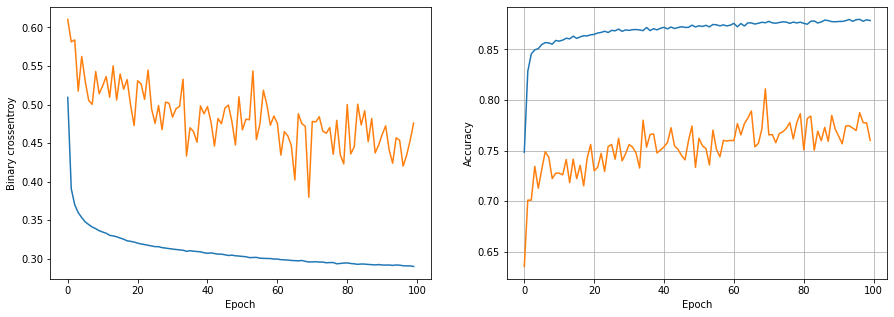

119/119 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8798
16 modes,dropout 0, lr 0.1, batch size 64


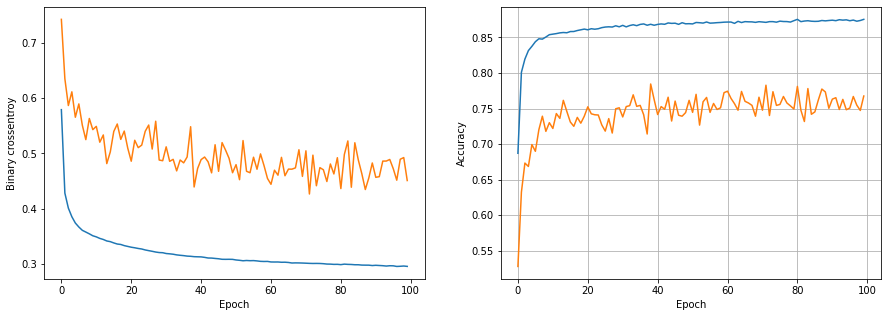

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8740
32 modes,dropout 0, lr 0.1, batch size 32


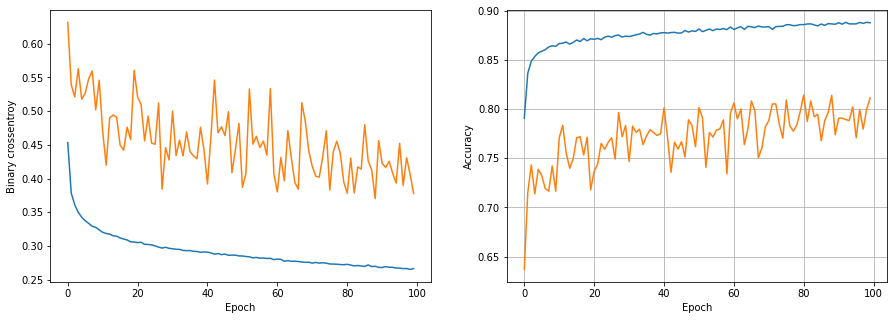

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8771
32 modes,dropout 0, lr 0.1, batch size 64


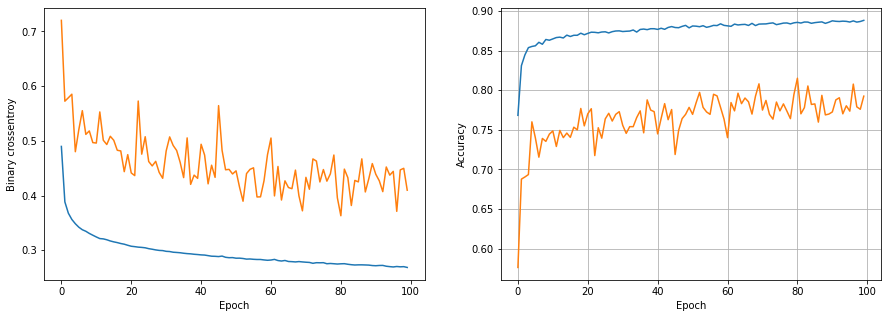

119/119 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8748


In [ ]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_modes in [16,32]:
  for dropout_prob in [0]:
    for lr in [0.1]:
      for batch_size in [32,64]:
        print(f"{num_modes} modes,dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train,y_train,num_modes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(x_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

Linear Regression